In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import ElasticNet
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

### EDA Básico

In [2]:
df = pd.read_csv('possum.csv')

In [3]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [4]:
df.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [6]:
df.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [7]:
df = df.dropna(axis = 0)

In [8]:
df.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [9]:
df = df.drop(["case"], axis = 1)

In [10]:
x = df.drop(["sex", "site", "Pop"], axis = 1)
y = df["sex"]

In [11]:
x

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...
99,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [12]:
y

0      m
1      f
2      f
3      f
4      f
      ..
99     m
100    m
101    f
102    m
103    f
Name: sex, Length: 101, dtype: object

In [13]:
lambda_func = lambda x: 1 if x=="m" else 0
y = y.apply(lambda_func)
y

0      1
1      0
2      0
3      0
4      0
      ..
99     1
100    1
101    0
102    1
103    0
Name: sex, Length: 101, dtype: int64

### Standarización

In [14]:
# StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

<AxesSubplot:>

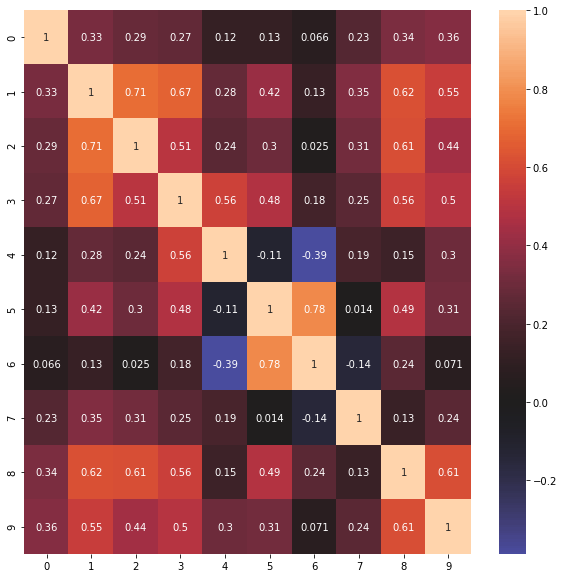

In [15]:
corr = pd.DataFrame(x).corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr,center=0, annot=True)

### Regresion Logistica

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 10)

In [17]:
# Hacer el fit del modelo
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
predicts = logistic_regression.predict(x_test)

In [19]:
predicts

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1])

In [20]:
acc = accuracy_score(y_test, predicts)
prec = precision_score(y_test, predicts)
rec = recall_score(y_test, predicts)
print("Accuracy", acc)
print("Precision", prec)
print("Recall", rec)

Accuracy 0.6153846153846154
Precision 0.6
Recall 0.6923076923076923


### Regresion Logistica con PCA

In [21]:
pca = PCA(n_components=2).fit(x)
X_pca = pca.transform(x)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.25, random_state = 10)

In [23]:
logRegPca = LogisticRegression(max_iter=1000)
logRegPca.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
preds = logRegPca.predict(x_test)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [25]:
acc = accuracy_score(y_test, preds)
prec = precision_score(y_test, preds)
rec = recall_score(y_test, preds)
print("Accuracy", acc)
print("Precision", prec)
print("Recall", rec)

Accuracy 0.5
Precision 0.5
Recall 1.0


### Clasificación con SGD

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 10)

In [32]:
clf = SGDClassifier(max_iter=1000, tol=1e-3)

In [33]:
clf.fit(X_train, y_train)

SGDClassifier()

In [34]:
predicts = clf.predict(X_test)
predicts

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1])

In [35]:
acc = accuracy_score(y_test, predicts)
prec = precision_score(y_test, predicts)
rec = recall_score(y_test, predicts)
print("Accuracy", acc)
print("Precision", prec)
print("Recall", rec)

Accuracy 0.6153846153846154
Precision 0.5789473684210527
Recall 0.8461538461538461


### K nearest neighbor

In [36]:
neigh = KNeighborsClassifier(n_neighbors=2)

In [37]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [38]:
predicts = neigh.predict(X_test)
predicts

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0])

In [39]:
acc = accuracy_score(y_test, predicts)
prec = precision_score(y_test, predicts)
rec = recall_score(y_test, predicts)
print("Accuracy", acc)
print("Precision", prec)
print("Recall", rec)

Accuracy 0.5384615384615384
Precision 0.5555555555555556
Recall 0.38461538461538464


### Naive Bayes (segun internet es lo mejor para clasificacion binaria)

In [40]:
gnb = GaussianNB()

In [41]:
gnb.fit(X_train, y_train)

GaussianNB()

In [42]:
predicts = gnb.predict(X_test)
predicts

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1])

In [43]:
acc = accuracy_score(y_test, predicts)
prec = precision_score(y_test, predicts)
rec = recall_score(y_test, predicts)
print("Accuracy", acc)
print("Precision", prec)
print("Recall", rec)

Accuracy 0.6538461538461539
Precision 0.6428571428571429
Recall 0.6923076923076923


### Regresion Lineal

In [45]:
#Preparamos dataset para regresion lineal

df = pd.read_csv('possum.csv')
df = df.dropna(axis = 0) #Borramos los null
df = df.drop(["case"], axis = 1) #Eliminamos columna Case
x = df.drop([ "site", "Pop", "totlngth"], axis = 1) #Eliminamos columnas que no usaremos
lambda_func = lambda x: 1 if x=="m" else 0
x['sex'] = x['sex'].apply(lambda_func) #Encoding de feature "sex"
y = df["totlngth"] #Defino labels

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 10)

In [47]:
# Hacer el fit del modelo
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)


LinearRegression()

In [48]:
predicts = linear_regression.predict(x_test)

In [49]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, predicts, squared=False)
print(rmse)

2.7179546713805145


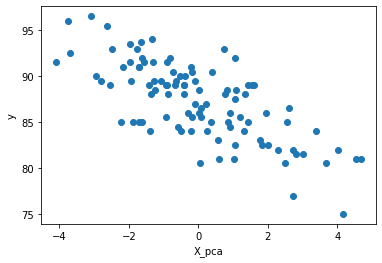

In [50]:
x_copy = x.copy()
#Aplicamos PCA para ver la forma de los datos

pca = PCA(n_components=1).fit(x_copy)
X_pca = pca.transform(x_copy)

plt.scatter(X_pca, y)
plt.xlabel('X_pca')
plt.ylabel('y')
plt.show()

El polinomio optimo es de grado: 1
El RMSE con polinomio optimo es: 3.3288295215288968


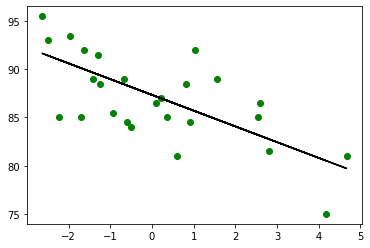

In [51]:
poly_degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] #Distintos grados de polinomio para probar el modelo

#Prueba inicial con polinomio grado 2:
poly = PolynomialFeatures(degree=2, include_bias=False) #Defino caracteristicas del polinomio
poly_features = poly.fit_transform(X_pca) #Hago fit con el polinomio definido
x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.25, random_state = 10)
poly_reg_model = LinearRegression()
poly_reg_model.fit(x_train, y_train)
y_predicted = poly_reg_model.predict(x_test)
rmse = mean_squared_error(y_test, y_predicted, squared=False)


rmse_tuned = np.zeros(len(poly_degrees))


for a in range(len(poly_degrees)):
    poly = PolynomialFeatures(degree=poly_degrees[a], include_bias=False) 
    poly_features = poly.fit_transform(X_pca) 
    x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.25, random_state = 10)
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(x_train, y_train)
    y_predicted = poly_reg_model.predict(x_test)
    rmse_tuned[a] = mean_squared_error(y_test, y_predicted, squared=False)
    

optimal_degree = poly_degrees[np.argmin(rmse_tuned)] 


#Ploteo con polinomio optimo
poly = PolynomialFeatures(degree=optimal_degree, include_bias=False) #Defino caracteristicas del polinomio
poly_features = poly.fit_transform(X_pca) #Hago fit con el polinomio definido
x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.25, random_state = 10)
poly_reg_model = LinearRegression()
poly_reg_model.fit(x_train, y_train)
y_predicted = poly_reg_model.predict(x_test)
rmse = mean_squared_error(y_test, y_predicted, squared=False)

print(f"El polinomio optimo es de grado: {optimal_degree}")
print(f"El RMSE con polinomio optimo es: {rmse}")

plt.scatter(x_test, y_test, color='g')
plt.plot(x_test, y_predicted, color='k')
plt.show()



### Regresion ElasticNet

Los coeficientes del modelo con hiperparametros default son: [-0.14794175  0.          1.05697793  0.10258667  0.76853208  0.65951564
  0.          0.          0.42880552  0.02895549]
La constante del modelo con hiperparametros defalut es: 87.35027631801822
R2 score con hiperparametros default: 0.5052786608808537
RMSE con hiperparametros default: 3.155442255373749



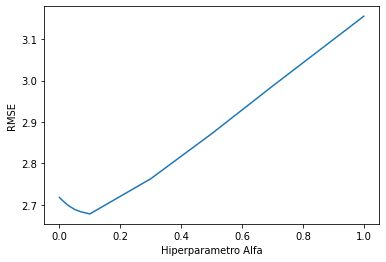

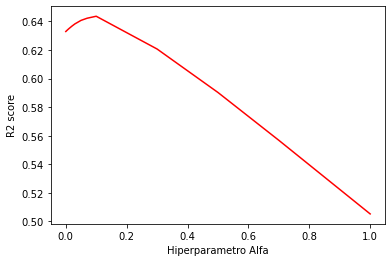

Los coeficientes del modelo con Alfa=0.1 son: [-0.67339628 -0.02831544  1.63163331  0.          1.59656194  0.95062207
  0.40113389  0.04373768  0.36037156 -0.03676766]
La constante del modelo con Alfa=0.1 es: 87.30016194208243
R2 score ccon Alfa=0.1: 0.6436562784213749
RMSE con Alfa=0.1: 2.6780240380795575


In [52]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 10)

#Defino el modelo - Empiezo probando con hiperparametros default: alpha=1, l1_ratio=0.5
enet_model = ElasticNet().fit(X_train, y_train)
print(f"Los coeficientes del modelo con hiperparametros default son: {enet_model.coef_ }")
print(f"La constante del modelo con hiperparametros defalut es: {enet_model.intercept_}")

y_pred = enet_model.predict(X_test)

RMSE = mean_squared_error(y_test,y_pred, squared= False)
R2 = r2_score(y_test,y_pred)
print(f"R2 score con hiperparametros default: {R2}")
print(f"RMSE con hiperparametros default: {RMSE}\n")
#print(f"Las variables independientes en este modelo explican el {round (R2 * 100, 2)}% del cambio en las variables dependientes para este dataset")

#Tuning del modelo: Encontrar los hiperparametros optimos (Es un poco confuso porque Sklearn llama "alfa" al lambda y L1_ratio al Alfa)
alphas = [0.0001, 0.001, 0.003, 0.005, 0.007, 0.01, 0.02, 0.03, 0.05, 0.07, 0.1, 0.3, 0.5, 0.7, 1]
RMSE_tuned = np.zeros(len(alphas))
R2_tuned = np.zeros(len(alphas))

for a in range(len(alphas)):
    model = ElasticNet(alpha=alphas[a]).fit(X_train,y_train)   
    y_pred = model.predict(X_test)
    R2_tuned[a] = r2_score(y_test,y_pred)
    RMSE_tuned[a] = mean_squared_error(y_test, y_pred, squared=False) 

#Grafico
plt.plot(alphas, RMSE_tuned)
plt.xlabel('Hiperparametro Alfa')
plt.ylabel('RMSE')
plt.show()
plt.figure()
plt.plot(alphas, R2_tuned, color='r')
plt.xlabel('Hiperparametro Alfa')
plt.ylabel('R2 score')
plt.show()

optimal_alpha = alphas[np.argmin(RMSE_tuned)]

#Modelo final
enet_tuned = ElasticNet(alpha = optimal_alpha).fit(X_train,y_train)
y_pred_tuned = enet_tuned.predict(X_test)
R2_tuned = r2_score(y_test,y_pred_tuned)
RMSE_tuned= mean_squared_error(y_test,y_pred_tuned, squared=False)

print(f"Los coeficientes del modelo con Alfa={optimal_alpha} son: {enet_tuned.coef_ }")
print(f"La constante del modelo con Alfa={optimal_alpha} es: {enet_tuned.intercept_}")
print(f"R2 score ccon Alfa={optimal_alpha}: {R2_tuned}")
print(f"RMSE con Alfa={optimal_alpha}: {RMSE_tuned}")

### Conclusiones: 
#### ElasticNet ajusta mejor a los datos que Regresion lineal aunque la mejora no es significativa debido a la naturaleza de los datos
#### Regresion logistica comun predice mejor que SGD dado que para calcular el optimo utiliza metodos numericos y SGD utiliza Gradiente Descendiente Estocastico
#### Para comparar, probamos con otros modelos no vistos en clase, como Naive Bayes y K Neighbors que son conocidos por performar mejor, y los resultados lo comprueban.